# Run 30 sites noisy Heisenberg model to compare with MPDO

In [1]:
import pickle

from mqt.yaqs.core.data_structures.networks import MPO, MPS
from mqt.yaqs.core.data_structures.noise_model import NoiseModel
from mqt.yaqs.core.libraries.gate_library import Z
from mqt.yaqs.core.data_structures.simulation_parameters import Observable, PhysicsSimParams
from mqt.yaqs import simulator

# Initialize parameters


In [ ]:
# Define the system Hamiltonian
L = 30
J = 1
g = 0.5
H_0 = MPO()
# H_0.init_Ising(L, d, J, g)
H_0.init_heisenberg(L, J, J, J, g)

# Define the initial state
state = MPS(L, state='wall')

# Define the simulation parameters
T = 10
dt = 0.1
sample_timesteps = True
N = 100
threshold = 0
order = 2

# Generate 1000 sites data of noisy and noiseless Heisenberg

In [ ]:
# Define the noise model
gamma_relaxation = 0
gamma_dephasing = 0
noise_model = NoiseModel(['relaxation', 'excitation'], [gamma_relaxation, gamma_dephasing])
max_bond_dim = 32

measurements = [Observable(Z(), site) for site in range(L)]
sim_params = PhysicsSimParams(measurements, T, dt, N, max_bond_dim, threshold, order, sample_timesteps = True)
simulator.run(state, H_0, sim_params, noise_model)

filename = f"30L_NoNoise.pickle"
with open(filename, 'wb') as f:
    pickle.dump({
        'sim_params': sim_params,
    }, f)

# Define the noise model
gamma_relaxation = 0.1
gamma_dephasing = 0.1
noise_model = NoiseModel(['relaxation', 'excitation'], [gamma_relaxation, gamma_dephasing])
max_bond_dim = 8

measurements = [Observable(Z(), site) for site in range(L)]
sim_params = PhysicsSimParams(measurements, T, dt, N, max_bond_dim, threshold, order, sample_timesteps = True)
simulator.run(state, H_0, sim_params, noise_model)

filename = f"30L_Noise.pickle"
with open(filename, 'wb') as f:
    pickle.dump({
        'sim_params': sim_params,
    }, f)

Running trajectories:  44%|████████▊           | 44/100 [03:24<05:50,  6.27s/it]

# Generate MPDO reference data.

NOTE: This requires a local installation of the package as it is not made easily available. (https://github.com/qiskit-community/lindbladmpo)

In [ ]:
sys.path.append('/Users/user/lindbladmpo')
from lindbladmpo.LindbladMPOSolver import LindbladMPOSolver


# Parameters
N = 30  # number of sites
J = 1    # X and Y coupling strength
J_z = 1  # Z coupling strength
h = 0.5  # transverse field strength
gamma_dephasing = 0.1  # dephasing rate (1/T2star)
gamma_relaxation = 0.1  # relaxation rate (1/T1)

# Time vector
T = 10
timesteps = 100
t = np.linspace(0, T, timesteps+1)

# Define parameters for LindbladMPOSolver
parameters = {
    "N": N,
    "t_final": T,
    "tau": T / (timesteps),  # time step
    "J": -2*J,  # coupling factor of XX and YY
    "J_z": -2*J_z, 
    "h_z": -2*h,
    "g_0": gamma_relaxation,  # Strength of deexcitation 
    "g_1": gamma_dephasing,  # Strength of dephasing
    "init_product_state": ["+z"]*15 + ["-z"]*15,  # initial state 
    "1q_components": ["X", "Y", "Z"],  # Request x, y, z observables
    "l_x": N,  # Length of the chain
    "l_y": 1,  # Width of the chain (1 for a 1D chain)
    "b_periodic_x": False,  # Open boundary conditions in x-direction
    "b_periodic_y": False,  # Open boundary conditions in y-direction
}

# Create a solver instance and run the simulation
solver = LindbladMPOSolver(parameters)
solver.solve()

# Access the LindbladMPO results
lindblad_mpo_results = solver.result

z_expectation_values_mpo = np.array([[solver.result['obs-1q'][('z', (i,))][1][t] 
                                for t in range(len(solver.result['obs-1q'][('z', (i,))][0]))] for i in range(N)])


pickle_filepath = 'lindblad_mpo_results.pkl'

data_to_save = {
    'parameters': parameters,  # Simulation parameters
    'result': lindblad_mpo_results,  # Lindblad MPO results
    # 'x_expectation_values_mpo': x_expectation_values_mpo,
    # 'y_expectation_values_mpo': y_expectation_values_mpo,
    'z_expectation_values_mpo': z_expectation_values_mpo
}

with open(pickle_filepath, 'wb') as f:
    pickle.dump(data_to_save, f)

# Plot Data

FileNotFoundError: [Errno 2] No such file or directory: '30L_NoNoise.pickle'

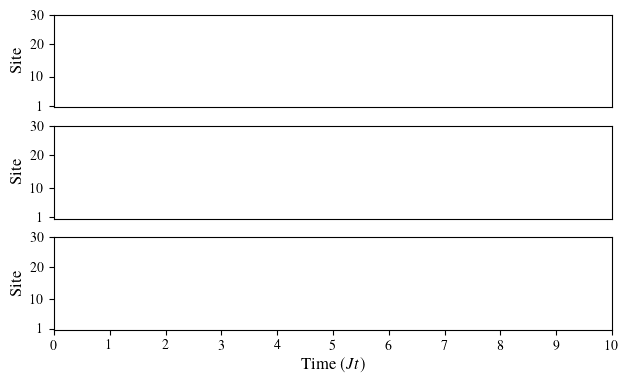

In [ ]:
from plotter_MPDO import plot_MPDO_data
plot_MPDO_data()